# Gene Expression Prediction Using ML

In [2]:
##Loading required libraries

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import *

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import seaborn as sns
%matplotlib inline

In [5]:
#Reading the raw data

data_raw = pd.read_csv('./Gene_Expression_Dataset.csv')

In [6]:
##Data dimensions and structure

print(data_raw.shape)

data_raw.head()



(15485, 517)


,GeneId,Expression,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,H3K27me3_1,H3K4me3_2,H3K4me1_2,H3K36me3_2,...,H3K4me3_mean,H3K4me1_mean,H3K36me3_mean,H3K9me3_mean,H3K27me3_mean,H3K4me3_median,H3K4me1_median,H3K36me3_median,H3K9me3_median,H3K27me3_median
0,1,0,2,1,4,1,0,0,2,1,...,1.59,0.70,1.18,1.78,0.85,1.0,0.0,0.0,1.0,1.0
1,2,0,1,0,1,0,0,0,0,0,...,1.29,0.50,0.35,0.51,0.74,1.0,0.0,0.0,0.0,1.0
2,3,1,1,6,3,1,1,1,6,1,...,1.01,2.84,7.46,12.58,1.36,1.0,2.0,6.0,3.0,1.0
3,4,1,0,4,3,2,1,0,2,8,...,1.65,1.77,5.99,10.35,1.55,1.0,2.0,3.0,3.0,1.0
4,5,1,0,1,2,0,0,0,0,4,...,0.70,1.17,9.89,2.41,0.97,0.0,1.0,6.5,1.5,1.0


## Expression is the target variable

## 0: Low Expression 1: High Expression

In [9]:
data_raw.describe()

,GeneId,Prediction,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,H3K27me3_1,H3K4me3_2,H3K4me1_2,H3K36me3_2,...,H3K4me3_mean,H3K4me1_mean,H3K36me3_mean,H3K9me3_mean,H3K27me3_mean,H3K4me3_median,H3K4me1_median,H3K36me3_median,H3K9me3_median,H3K27me3_median
count,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,...,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000,15485.000000
mean,7743.000000,0.500936,1.475557,1.740265,2.341815,1.847530,1.137036,1.478269,1.740523,2.354472,...,1.628247,1.533522,3.368313,5.099660,1.118989,1.341233,1.218696,2.327995,1.782176,0.876493
std,4470.278794,0.500015,1.874760,2.142546,3.810496,5.131625,1.476615,1.938940,2.127604,3.807168,...,1.356499,0.856633,2.494893,4.807508,0.619292,1.335168,0.756447,2.091057,1.954224,0.616369
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.770000,1.010000,1.210000,1.170000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,7743.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.140000,1.340000,2.970000,3.600000,1.060000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,11614.000000,1.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,2.090000,1.880000,4.860000,7.900000,1.340000,2.000000,1.500000,3.000000,2.000000,1.000000
max,15485.000000,1.000000,44.000000,32.000000,46.000000,108.000000,44.000000,66.000000,42.000000,45.000000,...,25.500000,15.490000,21.100000,42.270000,24.580000,15.000000,8.000000,22.000000,42.500000,14.000000


Expression
0    7728
1    7757
dtype: int64


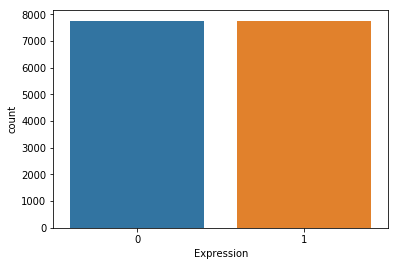

In [5]:
##Distribution of Expression/Prediction Variable

print(data_raw.groupby('Expression').size())
sns.countplot(data_raw.Expression,label="Count")

In [20]:
#Separating response (class) column from other variables

X=data_raw.drop('Expression',axis=1) #Predictors
X= X.drop('GeneId', axis=1) #Removing GeneId as it is not a predictor
y=data_raw['Expression'] #Response
X.head()

,H3K4me3_1,H3K4me1_1,H3K36me3_1,H3K9me3_1,H3K27me3_1,H3K4me3_2,H3K4me1_2,H3K36me3_2,H3K9me3_2,H3K27me3_2,...,H3K4me3_mean,H3K4me1_mean,H3K36me3_mean,H3K9me3_mean,H3K27me3_mean,H3K4me3_median,H3K4me1_median,H3K36me3_median,H3K9me3_median,H3K27me3_median
0,2,1,4,1,0,0,2,1,1,1,...,1.59,0.70,1.18,1.78,0.85,1.0,0.0,0.0,1.0,1.0
1,1,0,1,0,0,0,0,0,0,0,...,1.29,0.50,0.35,0.51,0.74,1.0,0.0,0.0,0.0,1.0
2,1,6,3,1,1,1,6,1,2,2,...,1.01,2.84,7.46,12.58,1.36,1.0,2.0,6.0,3.0,1.0
3,0,4,3,2,1,0,2,8,1,3,...,1.65,1.77,5.99,10.35,1.55,1.0,2.0,3.0,3.0,1.0
4,0,1,2,0,0,0,0,4,0,0,...,0.70,1.17,9.89,2.41,0.97,0.0,1.0,6.5,1.5,1.0


In [21]:
#Splitting dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle = True)

In [5]:
##Seeing the shape of test and training datset
print(X_train.shape)

print(X_test.shape)

(10839, 515)
(4646, 515)


# Important functions for Plotting Learning Curve and Getting best parameter for classifier

In [22]:
###Function for plotting learning curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [33]:
##Creating function to get best parameters for the classifier
def getParametersFromGridSearchCV(X_train, y_train, classifier, par_grid):

    kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)
    
    model = GridSearchCV(estimator = classifier, param_grid=par_grid, cv= kfold, return_train_score=True,n_jobs = 3)
    model.fit(X_train, y_train)
    print(model.best_params_)
    print(model.best_score_)
    return model.cv_results_["mean_train_score"], model.cv_results_["mean_test_score"], model.cv_results_["mean_fit_time"], model.cv_results_["params"]

# Models Implementation

# 1. Decision Tree

In [50]:
#Creating decision tree
dtree = DecisionTreeClassifier(random_state=20)
par_grid_tree = {'criterion': ['gini','entropy'],'max_depth': [5,10,15,20,25,30,50]} 
train_score1,test_score1,time1,params1 = getParametersFromGridSearchCV(X_train, y_train,dtree,par_grid_tree) 

{'criterion': 'gini', 'max_depth': 5}
0.843158963004


In [52]:
##Printing scores, times and parameters selected
print("Train_score =", train_score1,"\n","\n","Test_score =",test_score1,"\n","\n","Fit_time =", time1,"\n","\n","Params =",params1)

Train_score = [ 0.8610368   0.92721757  0.9626555   0.97637139  0.98582285  0.99209647
  0.99880062  0.85773595  0.92391675  0.9792929   0.99504875  0.99826757
  0.99909791  0.99909791] 
 
 Test_score = [ 0.84315896  0.82387674  0.81040686  0.8005351   0.78909493  0.78494326
  0.77959221  0.84297444  0.81824892  0.79499954  0.78346711  0.78374389
  0.78134514  0.78088385] 
 
 Fit_time = [ 0.70982904  1.42254179  2.01327348  2.39293423  2.81129582  3.08348458
  3.34447234  0.71568816  1.45716329  1.82434084  1.95218475  1.89963217
  1.89205058  1.91028464] 
 
 Params = [{'criterion': 'gini', 'max_depth': 5}, {'criterion': 'gini', 'max_depth': 10}, {'criterion': 'gini', 'max_depth': 15}, {'criterion': 'gini', 'max_depth': 20}, {'criterion': 'gini', 'max_depth': 25}, {'criterion': 'gini', 'max_depth': 30}, {'criterion': 'gini', 'max_depth': 50}, {'criterion': 'entropy', 'max_depth': 5}, {'criterion': 'entropy', 'max_depth': 10}, {'criterion': 'entropy', 'max_depth': 15}, {'criterion': 'en

In [48]:
##Testing accuracy on y_test with best parameters
dt_clf = DecisionTreeClassifier( max_depth=5 , criterion = "gini", random_state=20 )
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.82759362892811017

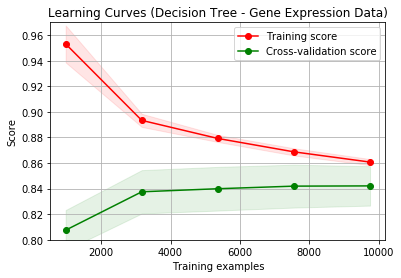

In [14]:
###Plotting Learning Curve for DT

title = "Learning Curves (Decision Tree - Gene Expression Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

dt_clf = DecisionTreeClassifier( max_depth=5, criterion = "gini", random_state=20 )

plot_learning_curve(dt_clf, title, X_train, y_train, ylim=(0.8, 0.97), cv=10, n_jobs=4)
plt.show()

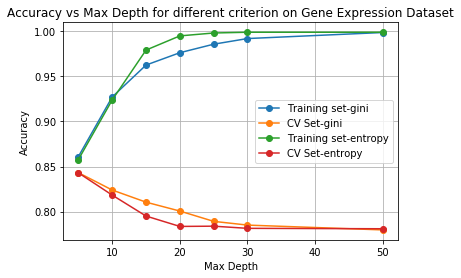

In [57]:
##Plotting accuracy vs max depth for each criterion curve 

index_gini = range(0,7)
index_entropy = range(7,14)

train_score_gini = []
test_score_gini = []
for i in index_gini:
    train_score_gini.append(train_score1.tolist()[i])
    test_score_gini.append(test_score1.tolist()[i])

train_score_entropy = []
test_score_entropy = []
for j in index_entropy:
    train_score_entropy.append(train_score1.tolist()[j])
    test_score_entropy.append(test_score1.tolist()[j])    
    

plt.figure()
plt.grid()    
plt.plot([5,10,15,20,25,30,50], train_score_gini, 'o-', label = "Training set-gini")
plt.plot([5,10,15,20,25,30,50], test_score_gini, 'o-', label = "CV Set-gini")
plt.plot([5,10,15,20,25,30,50], train_score_entropy, 'o-', label = "Training set-entropy")
plt.plot([5,10,15,20,25,30,50], test_score_entropy, 'o-', label = "CV Set-entropy")


#plt.xlim(0,60)
#plt.ylim(0.92,0.99)
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.title('Accuracy vs Max Depth for different criterion on Gene Expression Dataset')
plt.legend(loc ="best")
plt.show()

# 2. Gradient Boosting Classifier

In [58]:
#Creating Gradient Boosting Classifier
GB_clf = GradientBoostingClassifier(random_state=20)
par_grid_GB = {'n_estimators': [50,100,150,200,250],'max_depth': [5]} 
train_score2,test_score2,time2,params2 = getParametersFromGridSearchCV(X_train, y_train,GB_clf,par_grid_GB) 

{'max_depth': 5, 'n_estimators': 100}
0.856259802565


In [61]:
##Printing scores, times and parameters selected
print("Train_score =", train_score2,"\n","\n","Test_score =",test_score2,"\n","\n","Fit_time =", time2,"\n","\n","Params =",params2)

Train_score = [ 0.89928347  0.92321965  0.94615125  0.96600752  0.98114832] 
 
 Test_score = [ 0.85598302  0.8562598   0.85607528  0.85395332  0.85312298] 
 
 Fit_time = [  25.86824219   43.33411303   63.25359509   82.37377176  103.41165962] 
 
 Params = [{'max_depth': 5, 'n_estimators': 50}, {'max_depth': 5, 'n_estimators': 100}, {'max_depth': 5, 'n_estimators': 150}, {'max_depth': 5, 'n_estimators': 200}, {'max_depth': 5, 'n_estimators': 250}]


In [64]:
##Testing accuracy on y_test with best parameters
GB_clf = GradientBoostingClassifier( max_depth=5, n_estimators= 100,random_state= 20)
GB_clf.fit(X_train, y_train)
y_pred = GB_clf.predict(X_test)

accuracy_score(y_test,y_pred)

Wall time: 0 ns


0.84954799827808869

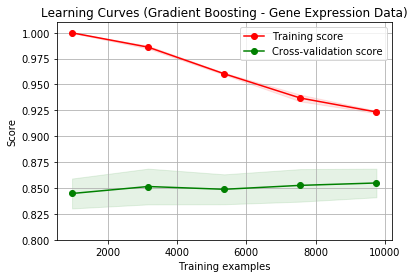

In [15]:
###Plotting Learning Curve for Gradient Boosting

title = "Learning Curves (Gradient Boosting - Gene Expression Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

GB_clf = GradientBoostingClassifier( max_depth=5, n_estimators = 100, random_state=20 )

plot_learning_curve(GB_clf, title, X_train, y_train, ylim=(0.8, 1.01), cv=10, n_jobs=10)
plt.show()

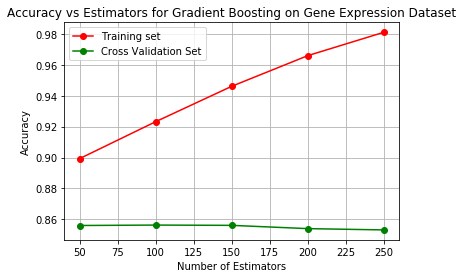

In [66]:
##Plotting Accuracy vs n_estimators graph using matplotlib

plt.figure()

plt.grid()
plt.plot(range(50,300,50), train_score2.tolist(), 'o-', color="r", label = "Training set")
plt.plot(range(50,300,50), test_score2.tolist(), 'o-', color="g", label = "Cross Validation Set")
plt.ylabel('Accuracy')
plt.xlabel('Number of Estimators')
plt.title('Accuracy vs Estimators for Gradient Boosting on Gene Expression Dataset')
#plt.tight_layout()
plt.legend()
plt.show()

# 3. SVM

In [44]:
##Standardizing the data for SVM 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_p = scaler.fit_transform(X_train)  # compute mean, std and transform training data as well
X_test_p = scaler.transform(X_test) # same as above

In [13]:
#Creating SVM Classifier
SVM_clf = SVC(random_state=300)
par_grid_SVM = {'kernel': ['linear','rbf', 'poly'], 'C': [1]} 
train_score3,test_score3,time3,params3 = getParametersFromGridSearchCV(X_train_p, y_train,SVM_clf,par_grid_SVM)

{'C': 1, 'kernel': 'rbf'}
0.853584278993


In [14]:
##Printing scores, times and parameters selected
print("Train_score =", train_score3,"\n","\n","Test_score =",test_score3,"\n","\n","Fit_time =", time3,"\n","\n","Params =",params3)

Train_score = [ 0.86505522  0.90321986  0.91346065] 
 
 Test_score = [ 0.84251315  0.85358428  0.84952486] 
 
 Fit_time = [ 528.17078371   59.9851826    71.90723424] 
 
 Params = [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'poly'}]


In [15]:
##Testing accuracy on y_test with best parameters
SVM_clf = SVC( kernel= 'rbf', C = 1 ,random_state= 300)
SVM_clf.fit(X_train_p, y_train)
y_pred = SVM_clf.predict(X_test_p)

accuracy_score(y_test,y_pred)

0.84761084804132591

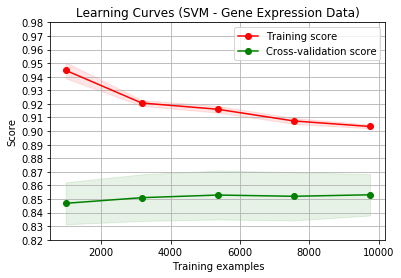

In [37]:
###Plotting Learning Curve for SVM

title = "Learning Curves (SVM - Gene Expression Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

SVM_clf = SVC( kernel= 'rbf', C = 1,random_state= 300)

plot_learning_curve(SVM_clf, title, X_train_p, y_train, ylim=(0.82,0.97), cv=10, n_jobs=10)
plt.yticks(np.arange(0.82,0.98,0.01))
plt.show()

# 4. KNN

In [18]:
#Creating KNN Classifier
KNN_clf = KNeighborsClassifier()
par_grid_KNN = {'n_neighbors' : range(5,45,10)} 
train_score4,test_score4,time4,params4 = getParametersFromGridSearchCV(X_train, y_train,KNN_clf,par_grid_KNN)

{'n_neighbors': 35}
0.851462312021


In [19]:
##Printing scores, times and parameters selected
print("Train_score =", train_score4,"\n","\n","Test_score =",test_score4,"\n","\n","Fit_time =", time4,"\n","\n","Params =",params4)

Train_score = [ 0.87497824  0.8615186   0.8572234   0.85669036] 
 
 Test_score = [ 0.83909955  0.8508165   0.84970938  0.85146231] 
 
 Fit_time = [ 0.84623652  1.31340818  1.29062171  1.23543077] 
 
 Params = [{'n_neighbors': 5}, {'n_neighbors': 15}, {'n_neighbors': 25}, {'n_neighbors': 35}]


In [25]:
##Checking for more K values
par_grid_KNN = {'n_neighbors' : range(50,250,50)} 
train_score4_1,test_score4_1,time4_1,params4_1 = getParametersFromGridSearchCV(X_train, y_train,KNN_clf,par_grid_KNN)

{'n_neighbors': 50}
0.851646830888


In [26]:
##Printing scores, times and parameters selected
print("Train_score =", train_score4_1,"\n","\n","Test_score =",test_score4_1,"\n","\n","Fit_time =", time4_1,"\n","\n","Params =",params4_1)

Train_score = [ 0.85486568  0.85283596  0.85113429  0.84975039] 
 
 Test_score = [ 0.85164683  0.85109327  0.85044746  0.84860227] 
 
 Fit_time = [ 1.16401505  2.27427797  1.86231873  1.94562261] 
 
 Params = [{'n_neighbors': 50}, {'n_neighbors': 100}, {'n_neighbors': 150}, {'n_neighbors': 200}]


In [52]:
##Testing accuracy on y_test with best parameters
KNN_clf = KNeighborsClassifier(n_neighbors= 50)
KNN_clf.fit(X_train, y_train)
y_pred = KNN_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.8484718037021094

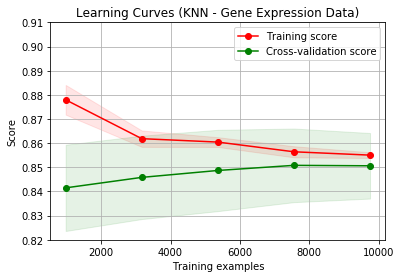

In [36]:
###Plotting Learning Curve for KNN

title = "Learning Curves (KNN - Gene Expression Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

KNN_clf = KNeighborsClassifier(n_neighbors=50)

plot_learning_curve(KNN_clf, title, X_train, y_train, ylim=(0.82, 0.90), cv=10, n_jobs=10)
plt.yticks(np.arange(0.82,0.91,0.01))
plt.show()

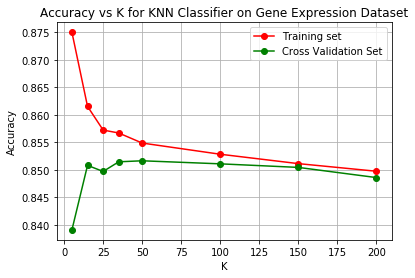

In [31]:
##Accuracy vs k graph
train_score4_2   = train_score4.tolist()+train_score4_1.tolist()
test_score4_2   = test_score4.tolist()+test_score4_1.tolist()

plt.figure()
plt.grid()
plt.plot([5,15,25,35,50,100,150,200], train_score4_2, 'o-', color="r", label = "Training set")
plt.plot([5,15,25,35,50,100,150,200], test_score4_2, 'o-', color="g", label = "Cross Validation Set")
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.title('Accuracy vs K for KNN Classifier on Gene Expression Dataset')
plt.legend()
plt.show()

# 5. Neural Network

In [36]:
#Creating Multi Layer Perceptron
MLP_clf = MLPClassifier(random_state =500, activation = 'tanh')
par_grid_MLP = {'max_iter' : range(50,300,50), 'hidden_layer_sizes' : [(5,2),(5,3),(5,4)]} 
train_score_iter,test_score_iter,time_iter,params_iter = getParametersFromGridSearchCV(X_train, y_train,MLP_clf,par_grid_MLP)

{'hidden_layer_sizes': (5, 2), 'max_iter': 100}
0.854230095027


In [37]:
##Printing scores, times and parameters selected
print("Train_score =", train_score_iter,"\n","\n","Test_score =",test_score_iter,"\n","\n","Fit_time =", time_iter,"\n","\n","Params =",
      params_iter)

Train_score = [ 0.87203621  0.87210797  0.87210797  0.87210797  0.87210797  0.86270762
  0.86273837  0.86273837  0.86273837  0.86273837  0.87211829  0.87280512
  0.87280512  0.87280512  0.87280512] 
 
 Test_score = [ 0.85413784  0.8542301   0.8542301   0.8542301   0.8542301   0.843528
  0.843528    0.843528    0.843528    0.843528    0.85201587  0.85183135
  0.85183135  0.85183135  0.85183135] 
 
 Fit_time = [  7.80796885  19.33740623  24.28365037  28.23638601  30.02774897
  20.191484    10.86860049   5.27189293   5.40314758  13.35341654
  61.02883708  80.14137416  78.13161206  71.88886578  51.32013628] 
 
 Params = [{'hidden_layer_sizes': (5, 2), 'max_iter': 50}, {'hidden_layer_sizes': (5, 2), 'max_iter': 100}, {'hidden_layer_sizes': (5, 2), 'max_iter': 150}, {'hidden_layer_sizes': (5, 2), 'max_iter': 200}, {'hidden_layer_sizes': (5, 2), 'max_iter': 250}, {'hidden_layer_sizes': (5, 3), 'max_iter': 50}, {'hidden_layer_sizes': (5, 3), 'max_iter': 100}, {'hidden_layer_sizes': (5, 3), 'ma

In [12]:
##Checking for neurons=100
par_grid_MLP = {'max_iter' : range(50,350,100), 'hidden_layer_sizes' : [(100,2),(100,3),(100,4)]} 
train_score_iter2,test_score_iter2,time_iter2,params_iter2 = getParametersFromGridSearchCV(X_train, y_train,MLP_clf,par_grid_MLP)

{'hidden_layer_sizes': (100, 4), 'max_iter': 150}
0.848602269582


In [13]:
##Printing scores, times and parameters selected
print("Train_score =", train_score_iter2,"\n","\n","Test_score =",test_score_iter2,"\n","\n","Fit_time =", time_iter2,"\n","\n","Params =",
      params_iter2)

Train_score = [ 0.90668472  0.91272265  0.91272265  0.91147177  0.9142396   0.9142396
  0.90009342  0.90317902  0.90317902] 
 
 Test_score = [ 0.84408156  0.841037    0.841037    0.8396531   0.84205185  0.84205185
  0.84491189  0.84860227  0.84860227] 
 
 Fit_time = [  98.61596501  194.71597035  233.15896957  208.46982379  244.90522757
  236.2931509   201.13066711  174.70091059  130.47419512] 
 
 Params = [{'hidden_layer_sizes': (100, 2), 'max_iter': 50}, {'hidden_layer_sizes': (100, 2), 'max_iter': 150}, {'hidden_layer_sizes': (100, 2), 'max_iter': 250}, {'hidden_layer_sizes': (100, 3), 'max_iter': 50}, {'hidden_layer_sizes': (100, 3), 'max_iter': 150}, {'hidden_layer_sizes': (100, 3), 'max_iter': 250}, {'hidden_layer_sizes': (100, 4), 'max_iter': 50}, {'hidden_layer_sizes': (100, 4), 'max_iter': 150}, {'hidden_layer_sizes': (100, 4), 'max_iter': 250}]


In [41]:
##Testing accuracy on y_test with best parameters
MLP_clf = MLPClassifier(random_state =500, activation = 'tanh', hidden_layer_sizes = (5, 2), max_iter =100 , solver = 'adam')
MLP_clf.fit(X_train, y_train)
y_pred = MLP_clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.84653465346534651

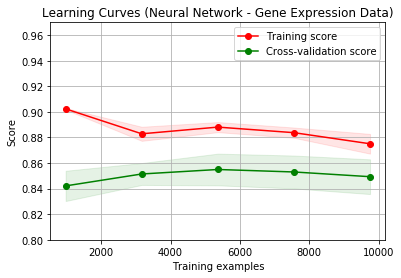

In [42]:
###Plotting Learning Curve for Neural Network

title = "Learning Curves (Neural Network - Gene Expression Data)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

MLP_clf =MLPClassifier(random_state =500, activation = 'tanh', hidden_layer_sizes = (5,2), max_iter = 100)

plot_learning_curve(MLP_clf, title, X_train, y_train, ylim=(0.8, 0.97), cv=10, n_jobs=10)
plt.yticks(np.arange(0.8,0.98,0.02))
plt.show()

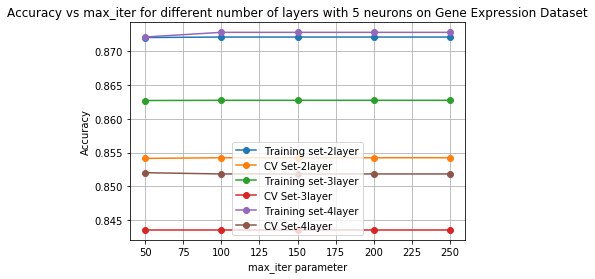

In [40]:
##Plotting accuracy vs iterations

##Plotting accuracy vs max_iter parameter for each kernel curve for rbf kernel
index_layer2 = range(0,5)
index_layer3 = range(5,10)
index_layer4 = range(10,15)

train_score_layer2 = []
test_score_layer2 = []
for i in index_layer2:
    train_score_layer2.append(train_score_iter.tolist()[i])
    test_score_layer2.append(test_score_iter.tolist()[i])

train_score_layer3 = []
test_score_layer3 = []
for j in index_layer3:
    train_score_layer3.append(train_score_iter.tolist()[j])
    test_score_layer3.append(test_score_iter.tolist()[j])    
    
train_score_layer4 = []
test_score_layer4 = []
for k in index_layer4:
    train_score_layer4.append(train_score_iter.tolist()[k])
    test_score_layer4.append(test_score_iter.tolist()[k])      

#train_score_layer5 = []
#test_score_layer5 = []
#for m in index_layer5:
#    train_score_layer5.append(train_score_iter.tolist()[m])
#    test_score_layer5.append(test_score_iter.tolist()[m])     
    
plt.figure()
plt.grid()    
plt.plot(range(50,300,50), train_score_layer2, 'o-', label = "Training set-2layer")
plt.plot(range(50,300,50), test_score_layer2, 'o-', label = "CV Set-2layer")
plt.plot(range(50,300,50), train_score_layer3, 'o-', label = "Training set-3layer")
plt.plot(range(50,300,50), test_score_layer3, 'o-', label = "CV Set-3layer")
plt.plot(range(50,300,50), train_score_layer4, 'o-', label = "Training set-4layer")
plt.plot(range(50,300,50), test_score_layer4, 'o-', label = "CV Set-4layer")
#plt.plot(range(50,350,100), train_score_layer5, 'o-', label = "Training set-5layer")
#plt.plot(range(50,450,50), test_score_layer5, 'o-', label = "CV Set-5layer")

#plt.xlim(0,60)
#plt.ylim(0.92,0.99)
plt.ylabel('Accuracy')
plt.xlabel('max_iter parameter')
plt.title('Accuracy vs max_iter for different number of layers with 5 neurons on Gene Expression Dataset')
plt.legend(loc ="best")
plt.show()